<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/eva/S10/S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from google.colab import files
#src = list(files.upload().values())[0]
#open('dataloader12.py','wb').write(src)
import dataloader12 as dl
#src = list(files.upload().values())[0]
#open('plotimagefinal.py','wb').write(src)
import plotimagefinal as pimage
#src = list(files.upload().values())[0]
#open('modeldefresnetfinal.py','wb').write(src)
import modeldefresnetfinal as modeldef
import torch
#src = list(files.upload().values())[0]
#open('lr_finder.py','wb').write(src)
from lr_finder import LRFinder
#src = list(files.upload().values())[0]
#open('modeltraintest16.py','wb').write(src)
import modeltraintest16 as modeltrt
#src = list(files.upload().values())[0]
#open('utils.py','wb').write(src)
import utils as utils
#src = list(files.upload().values())[0]
#open('gradcamfl.py','wb').write(src)
import gradcamfl as gcm
#src = list(files.upload().values())[0]
#open('gradcamresult8.py','wb').write(src)
import gradcamresult8 as gcr
import os

  pip install torch-lr-finder -v --global-option="amp"


In [3]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-9ff3e4la
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-9ff3e4la
     |████████████████████████████████| 634kB 4.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=358de6637a5142f92100338bfb96585c282eb978147ba13f4d1df2faa6109106
  Stored in directory: /tmp/pip-ephem-wheel-cache-ks2dga71/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=de47d22d2d8c5ed71c5991975e3de7414f4fcfee813916a9bba458b58bc74092
  Stored in directory: /tmp/pip-ephem-wheel-cache-ks2dga71/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Total dataset(train+test) shape:  (60000, 32, 32, 3)
mean0 0.49186864
mean1 0.48265335
mean2 0.44717798
std0 0.24697131
std1 0.24338901
std2 0.26159254
channel mean 0.47390000025431317
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Total dataset(train+test) shape:  (60000, 32, 32, 3)
meandata[0]: 0.49186864
Files already downloaded and verified
CUDA Available? True


plane   dog  deer  deer


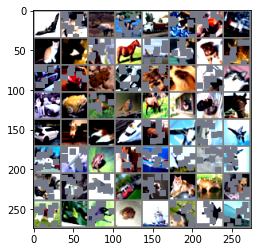

In [3]:
train_loader,test_loader,classes=dl.load_data()
pimage.show_random_images(train_loader,classes)

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = modeldef.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


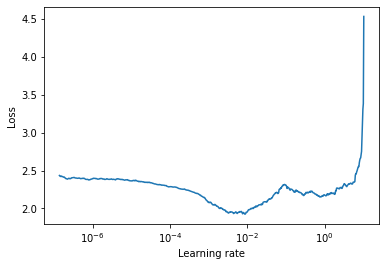

In [5]:
import torch.optim as optim

#model =  modeldef.net().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9)
modeltrt.lrfinder(model, device, train_loader, optimizer)


In [6]:
import torch.optim.lr_scheduler as lrs
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = lrs.ReduceLROnPlateau(optimizer, 'min')
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    modeltrt.train(model, device, train_loader, optimizer, epoch)
    val_loss=modeltrt.test(model, device, test_loader)
    scheduler.step(val_loss)


  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 1.3335, Accuracy: 5237/10000 (52.37%)

EPOCH: 1


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 1.0817, Accuracy: 6132/10000 (61.32%)

EPOCH: 2


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.9997, Accuracy: 6616/10000 (66.16%)

EPOCH: 3


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.7561, Accuracy: 7362/10000 (73.62%)

EPOCH: 4


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.6813, Accuracy: 7690/10000 (76.90%)

EPOCH: 5


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.6394, Accuracy: 7797/10000 (77.97%)

EPOCH: 6


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.5556, Accuracy: 8089/10000 (80.89%)

EPOCH: 7


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.5807, Accuracy: 8012/10000 (80.12%)

EPOCH: 8


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.5422, Accuracy: 8186/10000 (81.86%)

EPOCH: 9


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.5150, Accuracy: 8260/10000 (82.60%)

EPOCH: 10


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.5046, Accuracy: 8300/10000 (83.00%)

EPOCH: 11


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.4987, Accuracy: 8268/10000 (82.68%)

EPOCH: 12


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.4824, Accuracy: 8369/10000 (83.69%)

EPOCH: 13


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.4478, Accuracy: 8524/10000 (85.24%)

EPOCH: 14


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.4667, Accuracy: 8417/10000 (84.17%)

EPOCH: 15


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.4105, Accuracy: 8612/10000 (86.12%)

EPOCH: 16


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.4143, Accuracy: 8621/10000 (86.21%)

EPOCH: 17


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3947, Accuracy: 8677/10000 (86.77%)

EPOCH: 18


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3968, Accuracy: 8681/10000 (86.81%)

EPOCH: 19


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3882, Accuracy: 8706/10000 (87.06%)

EPOCH: 20


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3434, Accuracy: 8849/10000 (88.49%)

EPOCH: 21


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3909, Accuracy: 8697/10000 (86.97%)

EPOCH: 22


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3759, Accuracy: 8761/10000 (87.61%)

EPOCH: 23


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3514, Accuracy: 8827/10000 (88.27%)

EPOCH: 24


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3885, Accuracy: 8746/10000 (87.46%)

EPOCH: 25


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3771, Accuracy: 8769/10000 (87.69%)

EPOCH: 26


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3426, Accuracy: 8936/10000 (89.36%)

EPOCH: 27


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3571, Accuracy: 8847/10000 (88.47%)

EPOCH: 28


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Avg loss: 0.3284, Accuracy: 8949/10000 (89.49%)

EPOCH: 29


Loss=0.573398232460022 Accuracy=85.22: 100%|██████████| 782/782 [00:36<00:00, 21.49it/s]



Test set: Avg loss: 0.3414, Accuracy: 8911/10000 (89.11%)



30


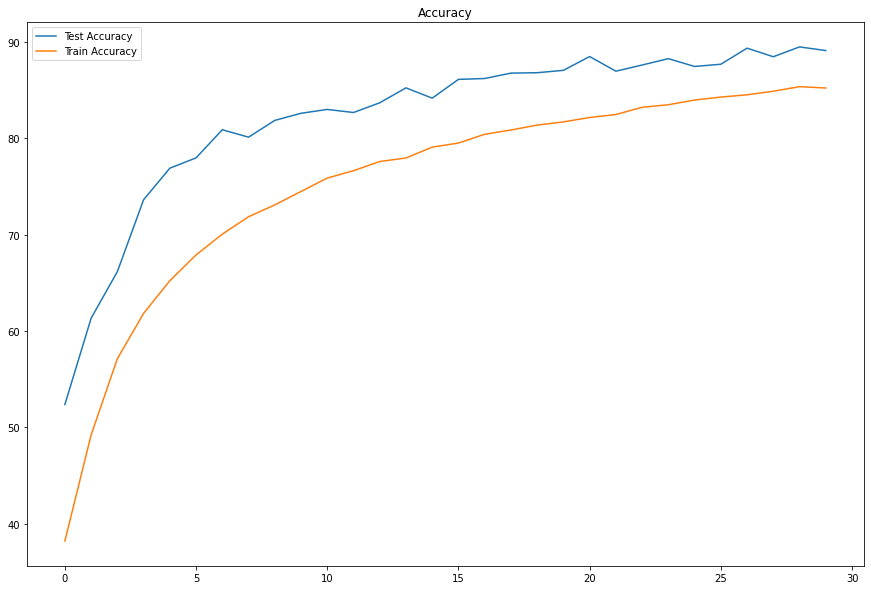

In [7]:

modeltrt.plotaccuracy()

GroundTruth:   deer  ship plane  frog


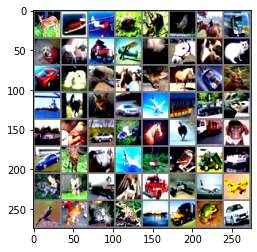

In [8]:

#Okay, first step. Let us display an image from the test set to get familiar. Consider only 4 images from a batch
images=utils.prtgroundtruth(test_loader,classes)


In [9]:
#Get the index of the highest energy (accuracy of those 4 images)
utils.getTestAccuracy(model,images,classes,test_loader,device)

Predicted:   deer  ship plane   cat
Accuracy of the network on the 10000 test images: 89 %


In [10]:
# 
# what are the classes that performed well, and the classes that did not perform well:
utils.getclassaccuracy(model,test_loader,classes,device)

Accuracy of plane : 83 %
Accuracy of   car : 98 %
Accuracy of  bird : 80 %
Accuracy of   cat : 77 %
Accuracy of  deer : 95 %
Accuracy of   dog : 79 %
Accuracy of  frog : 86 %
Accuracy of horse : 86 %
Accuracy of  ship : 87 %
Accuracy of truck : 96 %


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/0.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/1.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/2.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


/content/drive/My Drive/eva4/S10/misclassified/3.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/4.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/5.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/6.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/7.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/8.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/9.jpg
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
/content/drive/My Drive/eva4/S10/misclassified/10.jpg
saliency_map size : torch.Siz

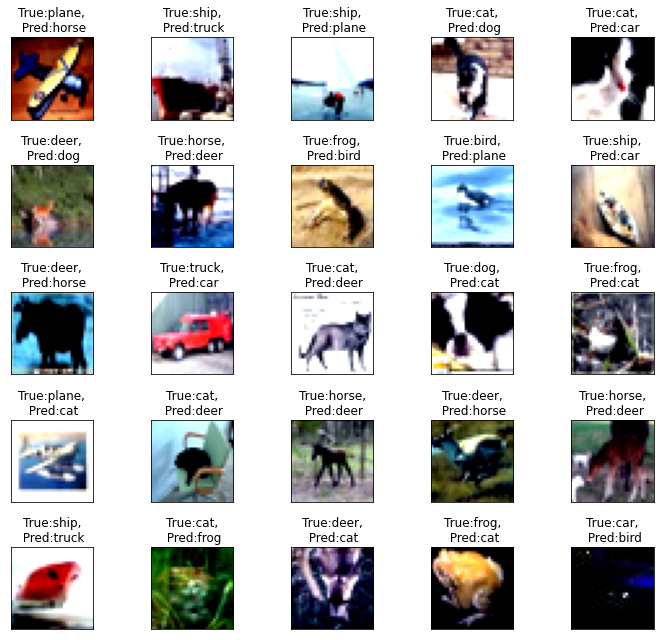

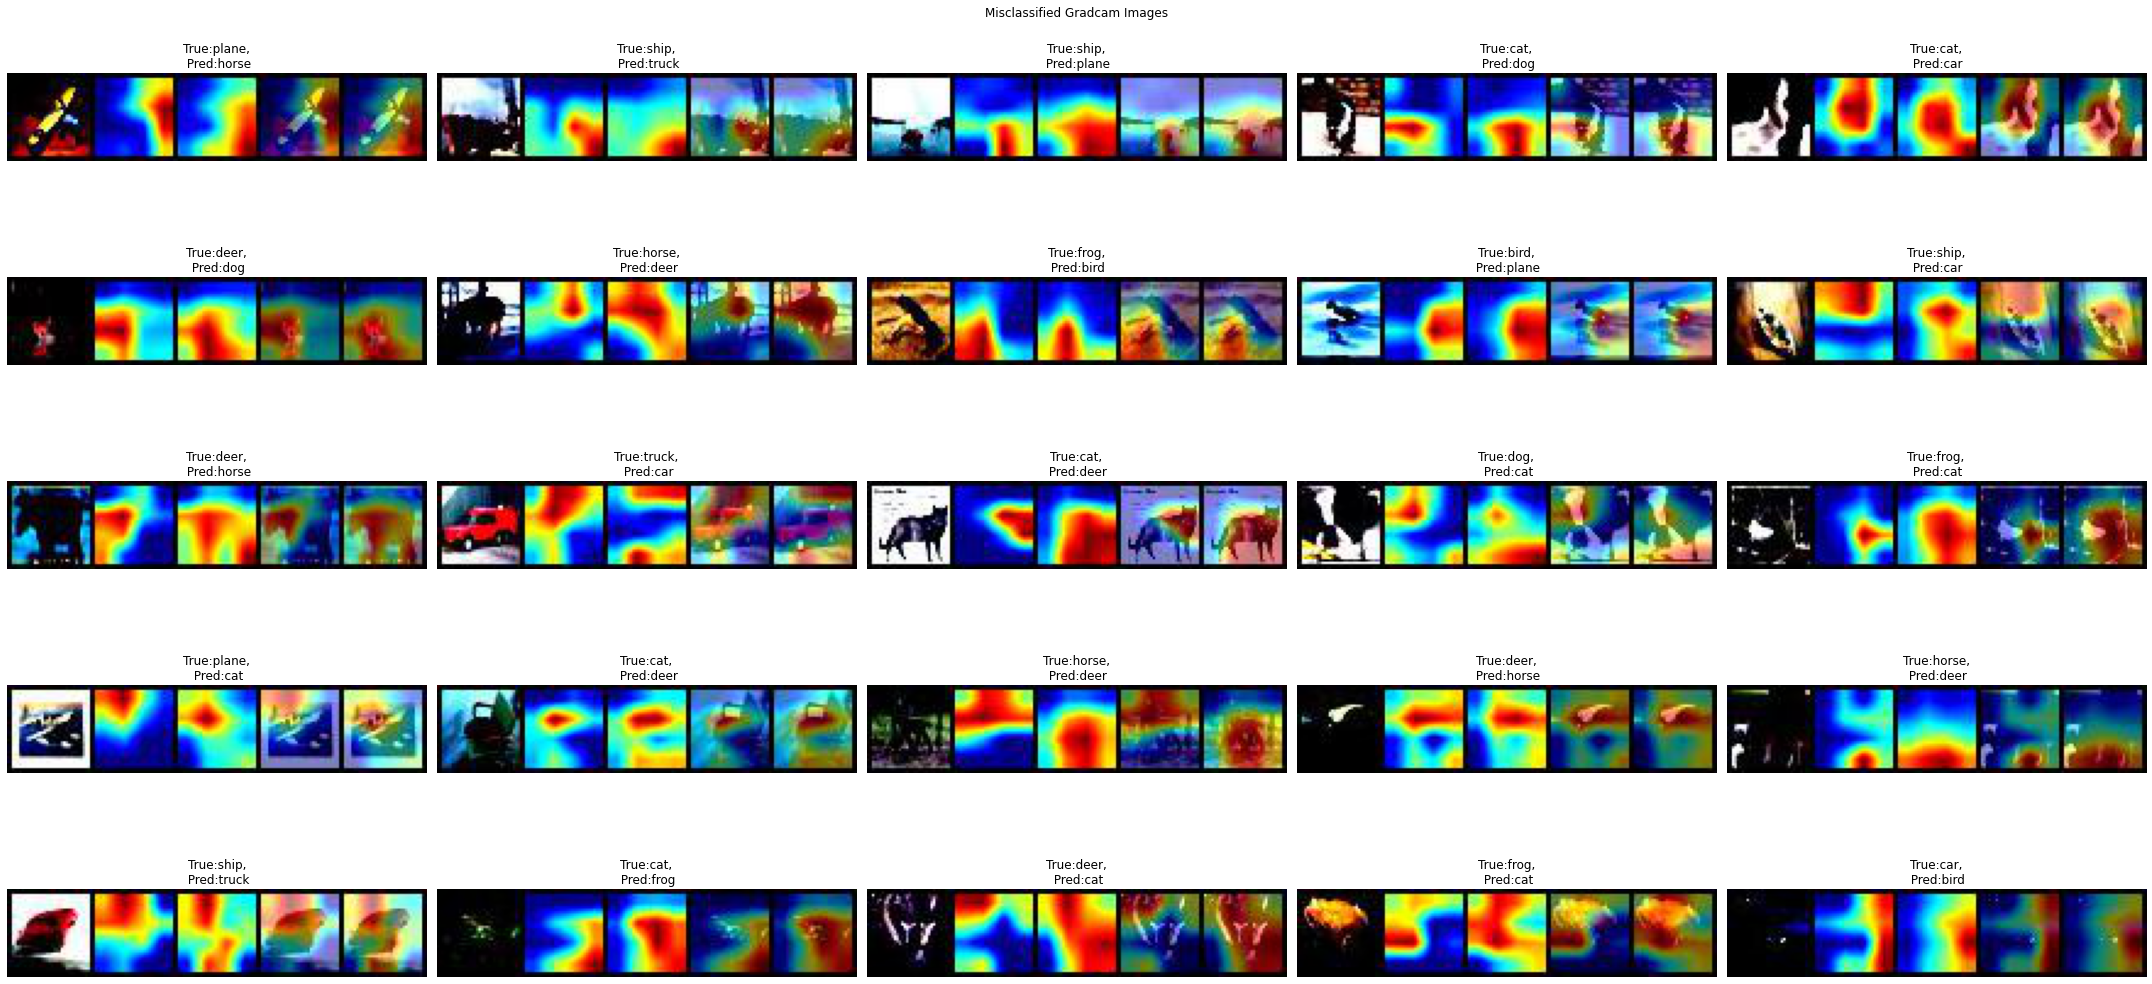

In [11]:
misclassifiedimgdir='/content/drive/My Drive/eva4/S10/misclassified'
names,titles=pimage.savemisclassifiedimages(model,device,classes,test_loader,misclassifiedimgdir,25)
misclassifiedgradcamimgs=[]
for name in names:
  pil_img=pimage.loadimage(misclassifiedimgdir,name)
  imgop=gcr.get_gradcam_op (model,'layer4',pil_img,name,misclassifiedimgdir)
  misclassifiedgradcamimgs.append(imgop)

print('idx',misclassifiedgradcamimgs[1])
pimage.plotmisclassifiedgradcamimages(misclassifiedgradcamimgs,titles,'gradcam_img')